In [1]:
# suppress warnings
import warnings;
warnings.filterwarnings('ignore');
import os
# common imports
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

plot_params = {'figure.figsize': (8, 4), 
               'axes.labelsize': 'large',
               'axes.titlesize': 'large',
               'xtick.labelsize': 'large',
               'ytick.labelsize':'large',
               'figure.dpi': 100}
# adjust matplotlib defaults
matplotlib.rcParams.update(plot_params)

import seaborn as sns
sns.set_style("darkgrid")

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
import html 
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BASE_DIR = "/content/drive/MyDrive/hackathon_berlin"
os.chdir(BASE_DIR)

In [4]:
file = "df.csv"
df = pd.read_csv(file)

In [5]:
df

,rev_Mean,mou_Range,totmrc_Range,da_Range,ovrmou_Range,ovrrev_Range,vceovr_Range,datovr_Range,roam_Range,change_mou,...,kid6_10_Y,kid6_10_nan,kid11_15_Y,kid11_15_nan,kid16_17_Y,kid16_17_nan,creditcd_Y,creditcd_nan,car_buy_UNKNOWN,car_buy_nan
0,4.648062,5.948035,2.456164,2.070653,5.707110,4.510860,4.473922,1.458615,0.576613,205.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.472510,6.192362,2.608450,1.447253,0.693147,0.329304,3.152438,0.329304,2.774502,96.00,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3.250181,5.023881,4.382277,1.134201,4.062212,3.131465,3.128761,0.886981,1.448946,-97.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.149306,6.061457,3.750274,1.180241,3.496508,2.360854,2.360854,0.418388,1.353350,-130.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.963951,5.159055,3.408661,1.068534,5.111988,4.073291,4.073291,0.778894,1.796722,94.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,3.433665,1.945910,2.229495,0.849650,1.991453,1.165903,1.165903,0.329304,1.485282,-1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34996,3.669123,5.278115,2.640876,1.109018,4.442651,3.414443,3.414443,1.205971,1.259022,27.75,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34997,3.673449,4.682131,2.922721,1.089673,2.830317,1.998549,2.725591,0.789498,2.474856,-44.75,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34998,3.937350,4.317488,3.433665,0.964387,3.599318,2.885648,3.479660,0.467850,1.768545,-36.25,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
df.isnull().sum().sort_values(ascending=False)

rev_Mean       0
occu1_E        0
occu1_K        0
occu1_J        0
occu1_I        0
              ..
crclscod_D4    0
crclscod_D5    0
crclscod_DA    0
crclscod_E     0
car_buy_nan    0
Length: 280, dtype: int64

In [7]:
df = df.dropna()

# Feature Selection - Boruta

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('churn', axis=1)
y = df['churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [14]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00


In [15]:
from boruta import BorutaPy

# Define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# Find all relevant features
feat_selector.fit(X_train.values, y_train.values)

# Check selected features
selected_features = X.columns[feat_selector.support_]

# Call transform() on X_train and X_test to filter them down to selected features
X_train_filtered = X_train[selected_features].copy()
X_test_filtered = X_test[selected_features].copy()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	279
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	50
Tentative: 	23
Rejected: 	206
Iteration: 	9 / 100
Confirmed: 	50
Tentative: 	23
Rejected: 	206
Iteration: 	10 / 100
Confirmed: 	50
Tentative: 	23
Rejected: 	206
Iteration: 	11 / 100
Confirmed: 	50
Tentative: 	23
Rejected: 	206
Iteration: 	12 / 100
Confirmed: 	51
Tentative: 	22
Rejected: 	206
Iteration: 	13 / 100
Confirmed: 	51
Tentative: 	18
Rejected: 	210
Iteration: 	14 / 100
Confirmed: 	51
Tentative: 	18
Rejected: 	210
Iteration: 	15 / 100
Confirmed: 	51
Tentative: 	18
Rejected: 	210
Iteration: 	16 / 100
Confirmed: 	

In [16]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['rev_Mean', 'mou_Range', 'totmrc_Range', 'ovrmou_Range', 'ovrrev_Range',
       'vceovr_Range', 'datovr_Range', 'roam_Range', 'change_mou',
       'change_rev', 'blck_dat_Mean', 'recv_sms_Mean', 'callfwdv_Mean',
       'recv_vce_Range', 'inonemin_Range', 'mou_cvce_Range',
       'mouiwylisv_Range', 'mou_pead_Range', 'mou_opkv_Range', 'months',
       'uniqsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou',
       'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev',
       'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'pre_hnd_price', 'phones',
       'models', 'lor', 'age1', 'age2', 'retdays', 'eqpdays',
       'days_since_last_swap', 'crclscod_EA', 'asl_flag_Y', 'refurb_new_R',
       'hnd_webcap_WC', 'hnd_webcap_WCMB', 'hnd_webcap_nan', 'ethnic_Z'],
      dtype='object')


# Feature selection - Lasso

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [29]:
X = df.drop('churn', axis=1)
y = df['churn']

In [31]:
# Create a Lasso regression model
lasso = Lasso()

In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Define a grid of alpha values to search over
alphas = [0.0001, 0.0002, 0.0003, 0.0004]  

# Perform grid search using cross-validation on the training set
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004]},
             scoring='neg_mean_squared_error')

In [46]:
# Get the best_alpha value
best_alpha = grid_search.best_estimator_.alpha

In [47]:
best_alpha

0.0003

In [48]:
# Train the Lasso model using the best_alpha value on the entire training set
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0003)

In [49]:
# Perform feature selection using the Lasso model on the training set
feature_selector = SelectFromModel(lasso, threshold='median')
X_train_selected = feature_selector.transform(X_train)

In [50]:
# Get the selected feature names
selected_features = X_train.columns[lasso.coef_ != 0]

In [51]:
print("Selected Features:", selected_features)

Selected Features: Index(['rev_Mean', 'mou_Range', 'totmrc_Range', 'da_Range', 'ovrrev_Range',
       'vceovr_Range', 'datovr_Range', 'roam_Range', 'change_mou',
       'change_rev',
       ...
       'kid3_5_Y', 'kid3_5_nan', 'kid6_10_nan', 'kid11_15_Y', 'kid11_15_nan',
       'kid16_17_Y', 'kid16_17_nan', 'creditcd_nan', 'car_buy_UNKNOWN',
       'car_buy_nan'],
      dtype='object', length=144)


In [66]:
result_list = list(selected_features)

In [67]:
print(result_list)

['rev_Mean', 'mou_Range', 'totmrc_Range', 'da_Range', 'ovrrev_Range', 'vceovr_Range', 'datovr_Range', 'roam_Range', 'change_mou', 'change_rev', 'drop_vce_Mean', 'plcd_dat_Mean', 'recv_sms_Mean', 'opk_dat_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'drop_dat_Range', 'blck_vce_Range', 'unan_vce_Range', 'recv_vce_Range', 'comp_vce_Range', 'comp_dat_Range', 'custcare_Range', 'ccrndmou_Range', 'cc_mou_Range', 'inonemin_Range', 'threeway_Range', 'mou_rvce_Range', 'mouowylisv_Range', 'iwylis_vce_Range', 'mouiwylisv_Range', 'peak_dat_Range', 'mou_peav_Range', 'opk_vce_Range', 'mou_opkv_Range', 'mou_opkd_Range', 'attempt_Range', 'callwait_Range', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'avgmou', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'pre_hnd_price', 'models', 'lor', 'age1', 'age2', 'adults', 'income', 'numbcars', 'retdays', 'eqpdays', 'days_since_last_swap', 'new_cell_U', 'new_cell_Y', 'crclscod_A2', 'crclscod_AA', 'crclscod_BA', 'crclscod_C'

In [54]:
selected_features_count = len(selected_features)
print("Number of selected features:", selected_features_count)

Number of selected features: 144


In [ ]:
def get_result():
    # Your code to generate the result as a list
    result = [1, 2, 3, 4, 5]
    return result

# Call the function to get the result
result_list = get_result()

# Now you can use the `result_list` variable to send the result wherever you need it
print(result_list)

In [55]:
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

In [56]:
X_train_selected.to_csv('train_selected.csv', index=False)
X_test_selected.to_csv('test_selected.csv', index=False)

In [58]:
X_combined = pd.concat([X_train, X_test], axis=0)

# Feature selection - RFECV

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(5), scoring='accuracy')

In [ ]:
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [ ]:
selected_features2 = X.columns[rfecv.support_]

In [ ]:
print("Selected Features:")
print(selected_features2)

Selected Features:
Index(['mou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'roam_Mean', 'rev_Range',
       'change_mou', 'change_rev', 'recv_vce_Mean', 'ccrndmou_Mean',
       'cc_mou_Mean', 'inonemin_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean',
       'mouowylisv_Mean', 'mouiwylisv_Mean', 'mou_peav_Mean', 'mou_opkv_Mean',
       'months', 'totmou', 'totrev', 'adjrev', 'adjqty', 'avg3mou', 'avg6qty',
       'age2', 'eqpdays'],
      dtype='object')


In [ ]:
selected_features2_count = len(selected_features2)
print("Number of selected features:", selected_features2_count)

Number of selected features: 26


# Outliers treatement

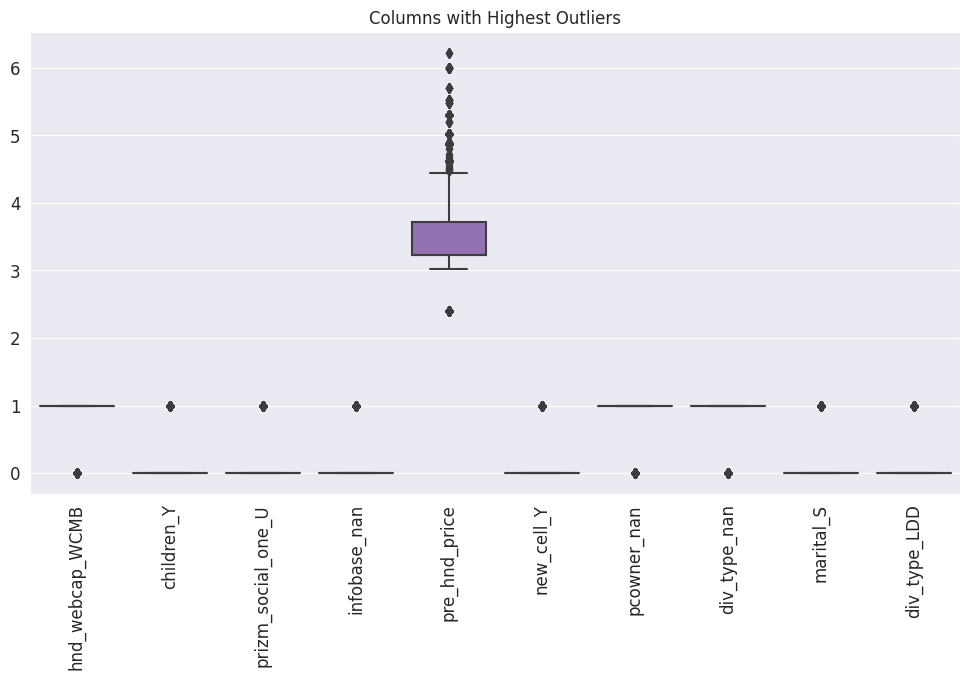

In [60]:
# Select columns with dtype float64 or int64
numeric_columns = X_combined.select_dtypes(include=['float64', 'int64'])

# Calculate the number of outliers for each numeric column
outlier_counts = (numeric_columns < numeric_columns.quantile(0.25) - 1.5 * (numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25))) | (numeric_columns > numeric_columns.quantile(0.75) + 1.5 * (numeric_columns.quantile(0.75) - numeric_columns.quantile(0.25)))
outlier_counts = outlier_counts.sum().sort_values(ascending=False)

# Select top 10 columns with the highest number of outliers
top_10_columns = outlier_counts.head(10).index

# Create box plots for the top 10 columns
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.boxplot(data=X_combined[top_10_columns])
plt.title("Columns with Highest Outliers")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [62]:
# Identify columns with numerical values
numerical_columns = X_combined.select_dtypes(include='number').columns

# Function to treat outliers using z-score approach
def treat_outliers(df, columns):
    for column in columns:
        # Calculate z-score for each value
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        
        # Set a threshold for outlier detection (e.g., z-score > 4 or < -4)
        threshold = 5
        
        # Replace outlier values with NaN
        df[column] = np.where(np.abs(z_scores) > threshold, np.nan, df[column])
    
    return df

# Treat outliers in numerical columns
raw_df_outliers_treated = treat_outliers(X_combined, numerical_columns)

In [63]:
missing_values = raw_df_outliers_treated.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_percentage
missing_values

rev_Mean            12
mou_Range            0
totmrc_Range         0
da_Range            28
ovrmou_Range         0
                  ... 
kid16_17_nan       614
creditcd_Y           0
creditcd_nan       614
car_buy_UNKNOWN      0
car_buy_nan        614
Length: 279, dtype: int64

In [64]:
selected_data = raw_df_outliers_treated.dropna()

In [65]:
selected_data

,rev_Mean,mou_Range,totmrc_Range,da_Range,ovrmou_Range,ovrrev_Range,vceovr_Range,datovr_Range,roam_Range,change_mou,...,kid6_10_Y,kid6_10_nan,kid11_15_Y,kid11_15_nan,kid16_17_Y,kid16_17_nan,creditcd_Y,creditcd_nan,car_buy_UNKNOWN,car_buy_nan
18788,4.194793,6.120297,2.899813,0.688135,4.962845,3.597312,3.597312,0.467850,3.288844,300.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
776,4.648158,5.023881,2.847995,0.688135,4.736198,3.375880,3.375880,0.329304,1.660860,-18.75,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
480,3.540597,1.098612,3.043637,0.688135,1.678326,1.121986,1.750804,0.852558,0.866965,-0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30078,3.754609,5.429346,2.305581,1.378766,4.842366,3.752132,3.752132,1.604029,1.674797,107.75,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29115,4.461098,5.796058,2.477437,1.091923,0.693147,0.329304,2.679227,0.329304,1.383522,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,1.787584,2.484907,2.408025,0.688135,2.484907,1.578979,1.578979,1.163090,1.741065,7.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17225,3.600868,4.418841,3.477007,1.601406,4.077081,3.162780,3.162780,1.118699,0.576613,-38.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22036,4.270920,6.641182,3.181015,0.688135,5.713733,4.670021,4.670021,1.212322,2.067196,327.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3256,5.422612,5.743003,1.987062,0.688135,4.457938,3.308632,3.326422,0.786839,1.303860,80.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
